___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [365]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [366]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/atheer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/atheer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/atheer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/atheer/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [367]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [368]:
df.shape

(23486, 11)

In [369]:
len(df)

23486

### Data Wrangling

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [370]:
# Keep 'Recommended IND' as the target variable
target_variable = 'Recommended IND'

# Drop unnecessary columns
df = df[[target_variable, 'Review Text', 'Rating', 'Positive Feedback Count']]


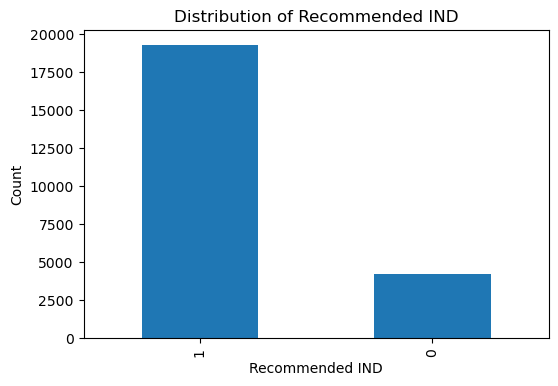

In [371]:
df["Recommended IND"].value_counts().plot(kind="bar", figsize=(6, 4))
plt.xlabel("Recommended IND")
plt.ylabel("Count")
plt.title("Distribution of Recommended IND")
plt.show()

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [372]:
# Rename columns for clarity
df = df.rename(columns={'Review Text': 'Review', 'Rating': 'Rating', 'Positive Feedback Count': 'Feedback Count'})
# Display the updated DataFrame
df.head()


,Recommended IND,Review,Rating,Feedback Count
0,1,Absolutely wonderful - silky and sexy and comf...,4,0
1,1,Love this dress! it's sooo pretty. i happene...,5,4
2,0,I had such high hopes for this dress and reall...,3,0
3,1,"I love, love, love this jumpsuit. it's fun, fl...",5,0
4,1,This shirt is very flattering to all due to th...,5,6


### Missing Value Detection

In [373]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the missing values count
print("Missing Values:\n", missing_values)

# Drop rows with missing values in the 'Review' column (if any)
df = df.dropna(subset=['Review'])

# Display the updated DataFrame
df.head()


Missing Values:
 Recommended IND      0
Review             845
Rating               0
Feedback Count       0
dtype: int64


,Recommended IND,Review,Rating,Feedback Count
0,1,Absolutely wonderful - silky and sexy and comf...,4,0
1,1,Love this dress! it's sooo pretty. i happene...,5,4
2,0,I had such high hopes for this dress and reall...,3,0
3,1,"I love, love, love this jumpsuit. it's fun, fl...",5,0
4,1,This shirt is very flattering to all due to th...,5,6


In [374]:
# Drop rows with missing values in the 'Review' column
df = df.dropna(subset=['Review'])

# Display the updated DataFrame
df.head()


,Recommended IND,Review,Rating,Feedback Count
0,1,Absolutely wonderful - silky and sexy and comf...,4,0
1,1,Love this dress! it's sooo pretty. i happene...,5,4
2,0,I had such high hopes for this dress and reall...,3,0
3,1,"I love, love, love this jumpsuit. it's fun, fl...",5,0
4,1,This shirt is very flattering to all due to th...,5,6


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22641 entries, 0 to 23485
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Recommended IND  22641 non-null  int64 
 1   Review           22641 non-null  object
 2   Rating           22641 non-null  int64 
 3   Feedback Count   22641 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 884.4+ KB


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [376]:
!pip install nltk


In [377]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Function to perform text preprocessing
def preprocess_text(text):
    words = word_tokenize(text) # Tokenization

    
    stop_words = set(stopwords.words('english')) # Noise removal
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    
    lemmatizer = WordNetLemmatizer() # Lexicon normalization: Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    
    preprocessed_text = ' '.join(words) # Join the words back into a single string

    return preprocessed_text

# Apply the preprocessing function to the 'Review' column
df['Processed Review'] = df['Review'].apply(preprocess_text)

# Display the updated DataFrame
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/atheer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/atheer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/atheer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Recommended IND,Review,Rating,Feedback Count,Processed Review
0,1,Absolutely wonderful - silky and sexy and comf...,4,0,absolutely wonderful silky sexy comfortable
1,1,Love this dress! it's sooo pretty. i happene...,5,4,love dress sooo pretty happened find store gla...
2,0,I had such high hopes for this dress and reall...,3,0,high hope dress really wanted work initially o...
3,1,"I love, love, love this jumpsuit. it's fun, fl...",5,0,love love love jumpsuit fun flirty fabulous ev...
4,1,This shirt is very flattering to all due to th...,5,6,shirt flattering due adjustable front tie perf...


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [378]:
!pip install wordcloud


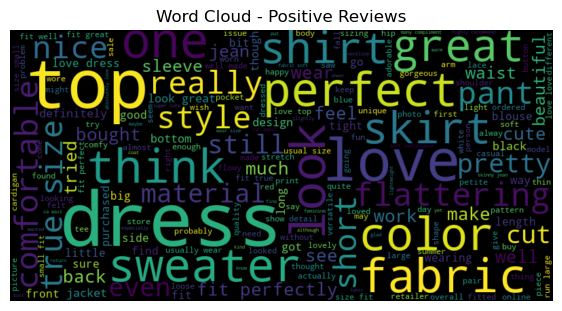

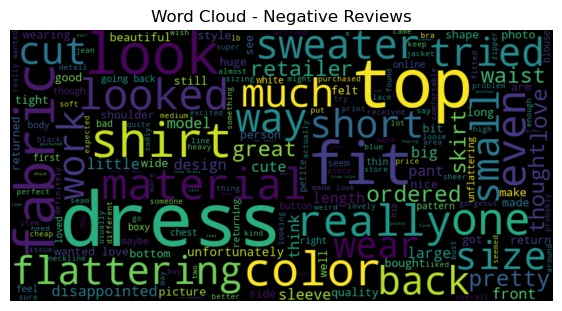

In [379]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate the dataset into positive and negative reviews
positive_reviews = df[df['Recommended IND'] == 1]['Processed Review']
negative_reviews = df[df['Recommended IND'] == 0]['Processed Review']

# Function to generate and display a word cloud
def generate_word_cloud(reviews, title):
    wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='black').generate(' '.join(reviews))

    plt.figure(figsize=(7, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for positive reviews
generate_word_cloud(positive_reviews, 'Word Cloud - Positive Reviews')

# Generate word cloud for negative reviews
generate_word_cloud(negative_reviews, 'Word Cloud - Negative Reviews')


### Collect Words (positive and negative separately)

In [380]:
from collections import Counter

# Define stop words
stop_words = set(stopwords.words('english'))

# Tokenize and preprocess all reviews
all_reviews = ' '.join(df['Processed Review'])
all_words = word_tokenize(all_reviews)
all_words = [word.lower() for word in all_words if word.isalpha() and word.lower() not in stop_words]

# Separate positive and negative reviews
positive_reviews = df[df['Recommended IND'] == 1]['Processed Review']
negative_reviews = df[df['Recommended IND'] == 0]['Processed Review']

# Tokenize and preprocess positive reviews
positive_words = word_tokenize(' '.join(positive_reviews))
positive_words = [word.lower() for word in positive_words if word.isalpha() and word.lower() not in stop_words]

# Tokenize and preprocess negative reviews
negative_words = word_tokenize(' '.join(negative_reviews))
negative_words = [word.lower() for word in negative_words if word.isalpha() and word.lower() not in stop_words]


In [381]:
positive_words = " ".join(positive_reviews)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long go petite also bit loose xx kept wil ldecide later since light color already sold hte small

In [382]:
negative_words = " ".join(negative_reviews)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first pullover styling side zipper would purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sadly returning sure find something exchange loved m

In [383]:
from collections import Counter
import re

# Assuming positive_words is your string of positive reviews
positive_words = re.findall(r'\b\w+\b', positive_words)  # Tokenize words

# Calculate word frequencies
word_frequencies = Counter(positive_words)

# Get the most common words
most_common_words = word_frequencies.most_common()
print("\nMost Common Words in Positive Reviews:")
# Display the top 10 most common words and their frequencies
for word, frequency in most_common_words[:10]:
    print(f"{word}: {frequency} times")



Most Common Words in Positive Reviews:
dress: 9249 times
fit: 8638 times
love: 8062 times
size: 8020 times
top: 6584 times
color: 5903 times
wear: 5740 times
great: 5572 times
look: 5308 times
like: 5290 times


In [384]:
negative_words = re.findall(r'\b\w+\b', negative_words)  # Tokenize words

# Calculate word frequencies
word_frequencies = Counter(negative_words)

# Get the most common words
most_common_words = word_frequencies.most_common()
print("\nMost Common Words in Negative Reviews:")
# Display the top 10 most common words and their frequencies
for word, frequency in most_common_words[:10]:

    print(f"{word}: {frequency} times")



Most Common Words in Negative Reviews:
dress: 2103 times
like: 1746 times
top: 1697 times
look: 1582 times
fit: 1490 times
would: 1449 times
size: 1343 times
fabric: 1265 times
back: 1026 times
color: 1013 times


### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [385]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

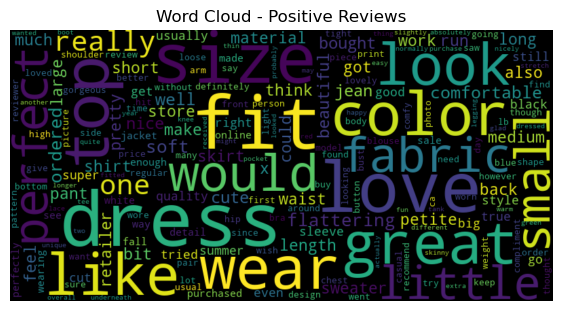

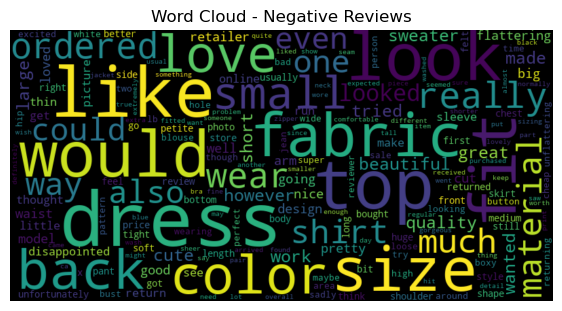

In [386]:

# Function to generate and display a word cloud
def generate_word_cloud(words, title):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='black').generate_from_frequencies(words)

    plt.figure(figsize=(7, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for positive reviews
generate_word_cloud(Counter(positive_words), 'Word Cloud - Positive Reviews')

# Generate word cloud for negative reviews
generate_word_cloud(Counter(negative_words), 'Word Cloud - Negative Reviews')



## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [387]:
from sklearn.model_selection import train_test_split


# Separate features (X) and target variable (y)
X = df['Processed Review']
y = df['Recommended IND']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [388]:
# Check data types
print(X_test.dtypes)

object


In [389]:
# Check for missing values
print(X_test.isnull().sum())

0


In [390]:
print(X_test.head())
print(X_test[:5])

13365    sweater beautiful thick material make look box...
19834    piece almost want tried white version x felt l...
18722    really like blouse returning larger size much ...
10635    perfect light weight relaxing summer pant fabr...
7348     look nothing like picture super longer look pi...
Name: Processed Review, dtype: object
13365    sweater beautiful thick material make look box...
19834    piece almost want tried white version x felt l...
18722    really like blouse returning larger size much ...
10635    perfect light weight relaxing summer pant fabr...
7348     look nothing like picture super longer look pi...
Name: Processed Review, dtype: object


### TF-IDF

In [391]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset size


X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) # Fit and transform the training data

X_test_tfidf = tfidf_vectorizer.transform(X_test) # Transform the test data

In [392]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [393]:
pd.DataFrame(X_train_tfidf.toarray(),
             columns = tfidf_vectorizer.get_feature_names_out())

,aa,ab,abdomen,ability,able,absolute,absolutely,abstract,absurd,abt,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Count Vectorization

In [394]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)  # You can adjust max_features based on your dataset size


X_train_count = count_vectorizer.fit_transform(X_train) # Fit and transform the training data
X_test_count = count_vectorizer.transform(X_test)# Transform the test data


In [395]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [396]:
pd.DataFrame(X_train_count.toarray(), columns = count_vectorizer.get_feature_names_out())

,aa,ab,abdomen,ability,able,absolute,absolutely,abstract,absurd,abt,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Eval Function

In [397]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Initialize the RandomForestClassifier (you can use other classifiers as well)
rf_classifier = RandomForestClassifier()

# Function to evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test, vectorizer_type):
    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_result = classification_report(y_test, y_pred)

    # Print or use the evaluation metrics as needed
    print(f'{vectorizer_type} - Accuracy: {accuracy:.2f}')
    print(f'{vectorizer_type} - Classification Report:\n', classification_report_result)

# Evaluate the models
evaluate_model(X_train_tfidf, X_test_tfidf, y_train, y_test, 'TF-IDF')
evaluate_model(X_train_count, X_test_count, y_train, y_test, 'CountVectorizer')


TF-IDF - Accuracy: 0.86
TF-IDF - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.28      0.43       812
           1       0.86      0.99      0.92      3717

    accuracy                           0.86      4529
   macro avg       0.86      0.64      0.67      4529
weighted avg       0.86      0.86      0.83      4529

CountVectorizer - Accuracy: 0.87
CountVectorizer - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.31      0.45       812
           1       0.87      0.99      0.92      3717

    accuracy                           0.87      4529
   macro avg       0.86      0.65      0.69      4529
weighted avg       0.86      0.87      0.84      4529



## Logistic Regression , RandomForestClassifier, SVC, Naive Bayes, Ada Boost

In [398]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Multinomial Naive Bayes': MultinomialNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
}


### CountVectorizer

In [399]:

# Train and evaluate each model
for model_name, model in models.items():

 # Count Vectorizer
    model.fit(X_train_count, y_train)
    y_pred_count = model.predict(X_test_count)
    accuracy_count = accuracy_score(y_test, y_pred_count)
    print(f"\n{model_name} - Count Vectorizer:")
    print(f"Accuracy: {accuracy_count:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred_count))
    


Logistic Regression - Count Vectorizer:
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.61      0.67       812
           1       0.92      0.95      0.94      3717

    accuracy                           0.89      4529
   macro avg       0.83      0.78      0.80      4529
weighted avg       0.89      0.89      0.89      4529


Random Forest - Count Vectorizer:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.30      0.44       812
           1       0.87      0.99      0.92      3717

    accuracy                           0.86      4529
   macro avg       0.84      0.64      0.68      4529
weighted avg       0.86      0.86      0.84      4529


Support Vector Machine - Count Vectorizer:
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.53      0.63       812


### TF-IDF

In [400]:
 for model_name, model in models.items():
    # TF-IDF
    model.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"\n{model_name} - TF-IDF:")
    print(f"Accuracy: {accuracy_tfidf:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))



Logistic Regression - TF-IDF:
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.53      0.63       812
           1       0.90      0.97      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.84      0.75      0.78      4529
weighted avg       0.88      0.89      0.88      4529


Random Forest - TF-IDF:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.27      0.41       812
           1       0.86      0.99      0.92      3717

    accuracy                           0.86      4529
   macro avg       0.86      0.63      0.66      4529
weighted avg       0.86      0.86      0.83      4529


Support Vector Machine - TF-IDF:
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.55      0.65       812
           1       0.91      0

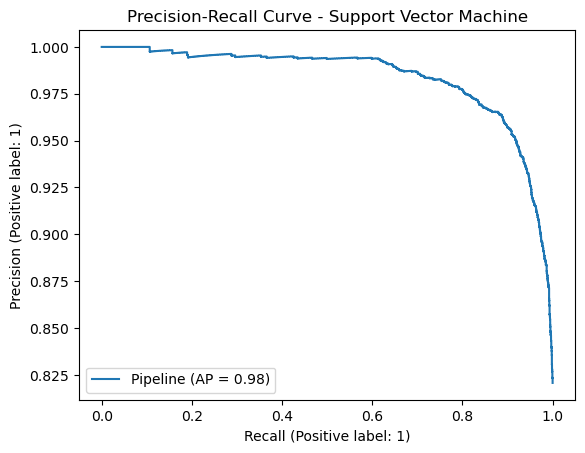

In [401]:
from sklearn.metrics import PrecisionRecallDisplay


svm_model = models['Support Vector Machine']
# Create a pipeline with TF-IDF and the Support Vector Machine model
pipeline_svm = make_pipeline(tfidf_vectorizer, svm_model)
# Train the model
pipeline_svm.fit(X_train, y_train)
# Make predictions on the test set
y_pred_svm = pipeline_svm.predict_proba(X_test)[:, 1]  # Probability of positive class
# Use PrecisionRecallDisplay with the SVM model
disp_svm = PrecisionRecallDisplay.from_estimator(pipeline_svm, X_test, y_test)
plt.title('Precision-Recall Curve - Support Vector Machine')
plt.show()


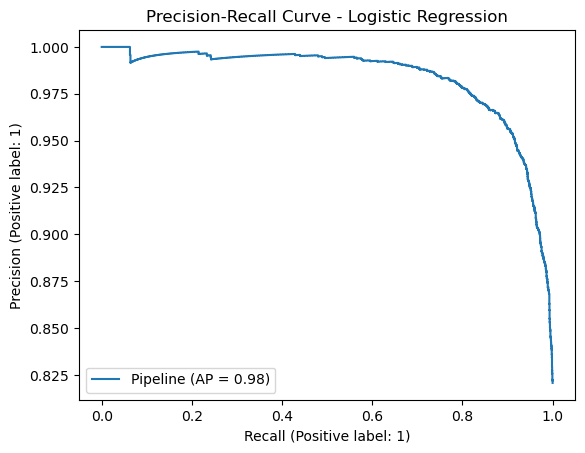

In [403]:
from sklearn.metrics import PrecisionRecallDisplay


log_model = models['Logistic Regression']
pipeline_log = make_pipeline(tfidf_vectorizer, log_model)
pipeline_log.fit(X_train, y_train)
y_pred_log = pipeline_log.predict_proba(X_test)[:, 1]  # Probability of positive class
disp_log = PrecisionRecallDisplay.from_estimator(pipeline_log, X_test, y_test)
plt.title('Precision-Recall Curve - Logistic Regression')
plt.show()

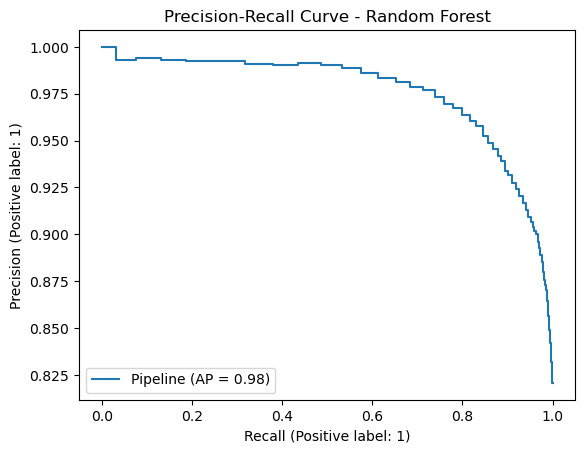

In [402]:
rf_model = models['Random Forest']
pipeline_rf = make_pipeline(tfidf_vectorizer, rf_model)
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict_proba(X_test)[:, 1]  # Probability of positive class
disp_rf = PrecisionRecallDisplay.from_estimator(pipeline_rf, X_test, y_test)
plt.title('Precision-Recall Curve - Random Forest')
plt.show()

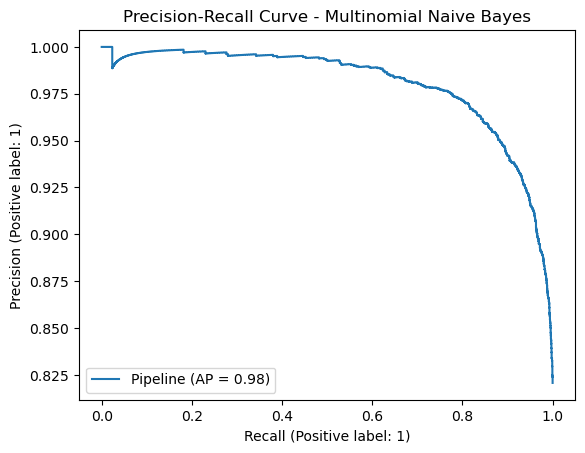

In [404]:
nv_model = models['Multinomial Naive Bayes']
pipeline_nv = make_pipeline(tfidf_vectorizer, nv_model)
pipeline_nv.fit(X_train, y_train)
y_pred_nv = pipeline_nv.predict_proba(X_test)[:, 1]  # Probability of positive class
disp_nv = PrecisionRecallDisplay.from_estimator(pipeline_nv, X_test, y_test)
plt.title('Precision-Recall Curve - Multinomial Naive Bayes')
plt.show()

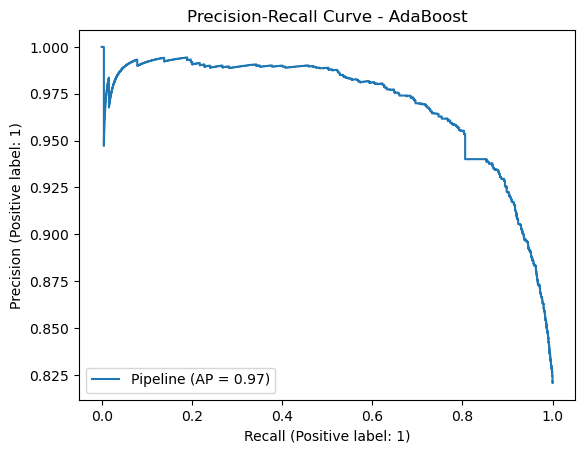

In [405]:
adab_model = models['AdaBoost']
pipeline_adab = make_pipeline(tfidf_vectorizer, adab_model)
pipeline_adab.fit(X_train, y_train)
y_pred_adab = pipeline_adab.predict_proba(X_test)[:, 1]  # Probability of positive class
disp_adab = PrecisionRecallDisplay.from_estimator(pipeline_adab, X_test, y_test)
plt.title('Precision-Recall Curve - AdaBoost')
plt.show()

## DL modeling

In [406]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

### Tokenization

In [407]:
X = df['Processed Review']
y = df['Recommended IND']

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [408]:
X

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked glad able ...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: Processed Review, Length: 22641, dtype: object

### Creating word index

In [409]:
word_index = tokenizer.word_index
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'size': 3,
 'love': 4,
 'top': 5,
 'like': 6,
 'color': 7,
 'look': 8,
 'wear': 9,
 'great': 10,
 'would': 11,
 'fabric': 12,
 'small': 13,
 'really': 14,
 'ordered': 15,
 'little': 16,
 'perfect': 17,
 'one': 18,
 'flattering': 19,
 'soft': 20,
 'well': 21,
 'back': 22,
 'comfortable': 23,
 'cute': 24,
 'nice': 25,
 'bought': 26,
 'beautiful': 27,
 'bit': 28,
 'material': 29,
 'shirt': 30,
 'large': 31,
 'much': 32,
 'sweater': 33,
 'length': 34,
 'run': 35,
 'jean': 36,
 'also': 37,
 'work': 38,
 'petite': 39,
 'got': 40,
 'long': 41,
 'could': 42,
 'short': 43,
 'waist': 44,
 'quality': 45,
 'medium': 46,
 'skirt': 47,
 'think': 48,
 'pretty': 49,
 'even': 50,
 'retailer': 51,
 'x': 52,
 'make': 53,
 'feel': 54,
 'tried': 55,
 'pant': 56,
 'store': 57,
 'usually': 58,
 'get': 59,
 'way': 60,
 'sleeve': 61,
 'good': 62,
 'big': 63,
 'made': 64,
 'cut': 65,
 'go': 66,
 'still': 67,
 'style': 68,
 'right': 69,
 'black': 70,
 'super': 71,
 'true': 72,
 'see': 73

In [410]:
len(tokenizer.word_index)

11908

### Converting tokens to numeric

In [411]:
sequences = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [412]:
max_tokens = [len(tokens) for tokens in sequences]
max_tokens = np.array(max_tokens)

In [413]:
max_tokens.mean()

27.61786140188154

In [414]:
max_tokens.max()

58

In [415]:
maxx_tokens = 58

In [292]:
sum(max_tokens <= maxx_tokens) / len(max_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [431]:

from keras.preprocessing.sequence import pad_sequences
X_padded = pad_sequences(sequences, maxlen=maxx_tokens, padding='post', truncating='post')


In [432]:
X_padded.shape

(22641, 100)

### Train Set Split

In [433]:
from sklearn.model_selection import train_test_split

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

### Modeling

In [435]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# Assuming you have already preprocessed your text data and obtained sequences

# Define the vocabulary size (adjust based on your dataset)
vocab_size = len(word_index) + 1

# Define the maximum length of input sequences (adjust based on your dataset)
maxx_tokens = 100

# Define the embedding dimension
embedding_dim = 50

# Define the model
model_dl = Sequential()

# Embedding layer
model_dl.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxx_tokens))

# GRU layer
model_dl.add(GRU(64, return_sequences=True))  # You can adjust the number of units as needed

# Dense layer
model_dl.add(Dense(64, activation='relu'))

# Output layer (adjust the number of units based on your task)
model_dl.add(Dense(1, activation='sigmoid'))

# Compile the model
model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model_dl.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 100, 50)           595450    
                                                                 
 gru_33 (GRU)                (None, 100, 64)           22272     
                                                                 
 dense_18 (Dense)            (None, 100, 64)           4160      
                                                                 
 dense_19 (Dense)            (None, 100, 1)            65        
                                                                 
Total params: 621947 (2.37 MB)
Trainable params: 621947 (2.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [436]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience = 2,
                           restore_best_weights=True)

In [437]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61094245, 2.75342049])

In [438]:
model_dl.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
141/142 [============================>.] - ETA: 0s - loss: 0.5426 - accuracy: 0.6689WARNING:tensorflow:Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


142/142 [==============================] - 8s 52ms/step - loss: 0.5421 - accuracy: 0.6693 - val_loss: 0.3788 - val_accuracy: 0.8409
Epoch 2/10
141/142 [============================>.] - ETA: 0s - loss: 0.3440 - accuracy: 0.8485WARNING:tensorflow:Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


142/142 [==============================] - 7s 49ms/step - loss: 0.3437 - accuracy: 0.8487 - val_loss: 0.3494 - val_accuracy: 0.8460
Epoch 3/10
141/142 [============================>.] - ETA: 0s - loss: 0.3065 - accuracy: 0.8663WARNING:tensorflow:Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


142/142 [==============================] - 7s 46ms/step - loss: 0.3066 - accuracy: 0.8661 - val_loss: 0.3882 - val_accuracy: 0.8312
Epoch 4/10
141/142 [============================>.] - ETA: 0s - loss: 0.2719 - accuracy: 0.8780WARNING:tensorflow:Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


142/142 [==============================] - 7s 47ms/step - loss: 0.2716 - accuracy: 0.8781 - val_loss: 0.3614 - val_accuracy: 0.8411
Epoch 5/10
142/142 [==============================] - ETA: 0s - loss: 0.2463 - accuracy: 0.8917WARNING:tensorflow:Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


142/142 [==============================] - 7s 50ms/step - loss: 0.2463 - accuracy: 0.8917 - val_loss: 0.4611 - val_accuracy: 0.8061
Epoch 6/10
141/142 [============================>.] - ETA: 0s - loss: 0.2305 - accuracy: 0.8960WARNING:tensorflow:Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


142/142 [==============================] - 7s 50ms/step - loss: 0.2305 - accuracy: 0.8959 - val_loss: 0.4011 - val_accuracy: 0.8511
Epoch 7/10
141/142 [============================>.] - ETA: 0s - loss: 0.2031 - accuracy: 0.9085WARNING:tensorflow:Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


142/142 [==============================] - 8s 53ms/step - loss: 0.2033 - accuracy: 0.9082 - val_loss: 0.4523 - val_accuracy: 0.8171
Epoch 8/10
141/142 [============================>.] - ETA: 0s - loss: 0.1825 - accuracy: 0.9169WARNING:tensorflow:Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


142/142 [==============================] - 7s 50ms/step - loss: 0.1825 - accuracy: 0.9169 - val_loss: 0.4553 - val_accuracy: 0.8262
Epoch 9/10
141/142 [============================>.] - ETA: 0s - loss: 0.1624 - accuracy: 0.9253WARNING:tensorflow:Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


142/142 [==============================] - 7s 49ms/step - loss: 0.1624 - accuracy: 0.9252 - val_loss: 0.4934 - val_accuracy: 0.8399
Epoch 10/10
142/142 [==============================] - ETA: 0s - loss: 0.1497 - accuracy: 0.9305WARNING:tensorflow:Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


142/142 [==============================] - 7s 46ms/step - loss: 0.1497 - accuracy: 0.9305 - val_loss: 0.5026 - val_accuracy: 0.8352


In [439]:
model_dl_loss = pd.DataFrame(model_dl.history.history)
model_dl_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.542117,0.669302,0.378758,0.840916
1,0.343694,0.848656,0.349396,0.846050
2,0.306619,0.866074,0.388201,0.831161
3,0.271558,0.878127,0.361388,0.841111
4,0.246329,0.891710,0.461131,0.806096


<Axes: >

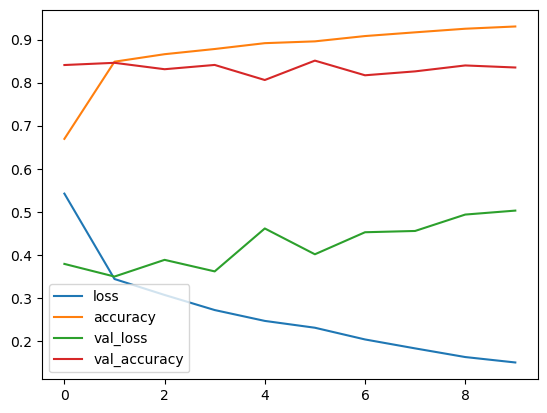

In [440]:
model_dl_loss.plot()

### Model Evaluation

In [441]:
# Evaluate the model on the test set
accuracy = model_dl.evaluate(X_test, y_test)[1]
print(f'Model Accuracy on Test Set: {accuracy:.2f}')

142/142 [==============================] - 1s 5ms/step - loss: 0.5026 - accuracy: 0.8352
Model Accuracy on Test Set: 0.84


In [442]:
model_dl.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 100, 50)           595450    
                                                                 
 gru_33 (GRU)                (None, 100, 64)           22272     
                                                                 
 dense_18 (Dense)            (None, 100, 64)           4160      
                                                                 
 dense_19 (Dense)            (None, 100, 1)            65        
                                                                 
Total params: 621947 (2.37 MB)
Trainable params: 621947 (2.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## BERT Modeling

In [443]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


X = df['Processed Review']
y = df['Recommended IND']


In [444]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Recommended IND, dtype: int64

In [445]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train test split

### Tokenization

In [446]:
# Tokenization
max_words = 10000  # Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)


### Fixing token counts of all documents

In [447]:
# Fixing token counts of all documents (pad_sequences)
max_len = 100  # Maximum length of sequences
X_train_padded = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len, padding='post', truncating='post')


### Transformation Matrix to Tensorflow tensor

In [448]:
# Transforming  matrices to tensor 
X_train_padded = tf.convert_to_tensor(X_train_padded, dtype=tf.float32)
X_test_padded = tf.convert_to_tensor(X_test_padded, dtype=tf.float32)

In [456]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPooling1D, Dropout, Dense

embedding_dim = 50
max_words = 10000  
max_len = 100  

# Creating the Bidirectional LSTM model
model_Bret = Sequential()
model_Bret.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model_Bret.add(Bidirectional(LSTM(64, return_sequences=True)))
model_Bret.add(GlobalMaxPooling1D())
model_Bret.add(Dropout(0.5))
model_Bret.add(Dense(1, activation='sigmoid'))

# Compile the model
model_Bret.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### Transformation Vectors to Matrices

In [457]:

# Transforming vectors to matrices 
X_train_padded = tf.convert_to_tensor(X_train_padded, dtype=tf.float32)
X_test_padded = tf.convert_to_tensor(X_test_padded, dtype=tf.float32)


### Creating optimization

In [458]:
# Creating an optimization function
def custom_optimizer(learning_rate=0.001):
    return tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [463]:
y_pred_bert = model_Bret.predict(X_test_padded)


threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
y_pred_binary_bert = (y_pred_bert > threshold).astype(int)


142/142 [==============================] - 1s 6ms/step


In [464]:
# Training the model
model_Bret.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluating the model on the test set
accuracy = model_Bret.evaluate(X_test_padded, y_test)[1]
print(f'Model Accuracy on Test Set: {accuracy:.2f}')

Epoch 1/5
227/227 [==============================] - 9s 38ms/step - loss: 0.1164 - accuracy: 0.9580 - val_loss: 0.4431 - val_accuracy: 0.8559
Epoch 2/5
227/227 [==============================] - 9s 39ms/step - loss: 0.1000 - accuracy: 0.9636 - val_loss: 0.4692 - val_accuracy: 0.8614
Epoch 3/5
227/227 [==============================] - 8s 37ms/step - loss: 0.0866 - accuracy: 0.9681 - val_loss: 0.4909 - val_accuracy: 0.8590
Epoch 4/5
227/227 [==============================] - 9s 38ms/step - loss: 0.0669 - accuracy: 0.9763 - val_loss: 0.5772 - val_accuracy: 0.8590
Epoch 5/5
142/142 [==============================] - 1s 6ms/step - loss: 0.4823 - accuracy: 0.8651
Model Accuracy on Test Set: 0.87


### Batch Size

In [474]:
# Training the model with a specified batch size
batch_size = 32  

model_Bret.fit(X_train_padded, y_train, epochs=5, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
453/453 [==============================] - 11s 24ms/step - loss: 0.0696 - accuracy: 0.9758 - val_loss: 0.5221 - val_accuracy: 0.8465
Epoch 2/5
453/453 [==============================] - 11s 24ms/step - loss: 0.0533 - accuracy: 0.9799 - val_loss: 0.6334 - val_accuracy: 0.8545
Epoch 3/5
453/453 [==============================] - 11s 23ms/step - loss: 0.0410 - accuracy: 0.9850 - val_loss: 0.7315 - val_accuracy: 0.8446
Epoch 4/5
453/453 [==============================] - 10s 23ms/step - loss: 0.0393 - accuracy: 0.9862 - val_loss: 0.6905 - val_accuracy: 0.8521
Epoch 5/5
453/453 [==============================] - 11s 24ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.8471 - val_accuracy: 0.8465


In [478]:
model_Bret_loss = pd.DataFrame(model_Bret.history.history)
model_Bret_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.069576,0.975775,0.522140,0.846536
1,0.053300,0.979916,0.633404,0.854540
2,0.041028,0.985023,0.731467,0.844604
3,0.039294,0.986196,0.690479,0.852056
4,0.029537,0.990614,0.847091,0.846536


<Axes: >

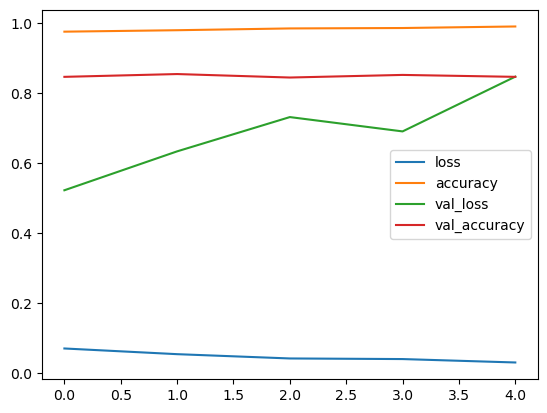

In [479]:
model_Bret_loss.plot()

### Creating Model with TPU

In [480]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Tokenization
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

In [481]:
# Convert text to sequences of numeric indices
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [482]:
# Fixing token counts of all documents (pad_sequences)
max_len = 100  # Adjusted to match the model's expected input length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')

In [483]:

# Define TPU strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:

    strategy = tf.distribute.get_strategy()

with strategy.scope():
    model_tpu = Sequential()
    model_tpu.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
    model_tpu.add(Bidirectional(LSTM(64)))
    model_tpu.add(Dropout(0.5))
    model_tpu.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model_tpu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### Model Fiting

In [484]:
batch_size = 32
model_tpu.fit(X_train_padded, y_train, epochs=5, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
453/453 [==============================] - 11s 22ms/step - loss: 0.3382 - accuracy: 0.8613 - val_loss: 0.3072 - val_accuracy: 0.8797
Epoch 2/5
453/453 [==============================] - 10s 21ms/step - loss: 0.2216 - accuracy: 0.9116 - val_loss: 0.2963 - val_accuracy: 0.8799
Epoch 3/5
453/453 [==============================] - 10s 21ms/step - loss: 0.1763 - accuracy: 0.9315 - val_loss: 0.3088 - val_accuracy: 0.8758
Epoch 4/5
453/453 [==============================] - 10s 22ms/step - loss: 0.1477 - accuracy: 0.9457 - val_loss: 0.4015 - val_accuracy: 0.8670
Epoch 5/5
453/453 [==============================] - 9s 21ms/step - loss: 0.1219 - accuracy: 0.9552 - val_loss: 0.3664 - val_accuracy: 0.8598


### Model evaluation

In [485]:
# Evaluating the model on the test set
accuracy = model_tpu.evaluate(X_test_padded, y_test)[1]
print(f'Model Accuracy on Test Set: {accuracy:.2f}')


142/142 [==============================] - 1s 5ms/step - loss: 0.3249 - accuracy: 0.8748
Model Accuracy on Test Set: 0.87


### Compare Models F1 Scores, Recall Scores and Average Precision Score

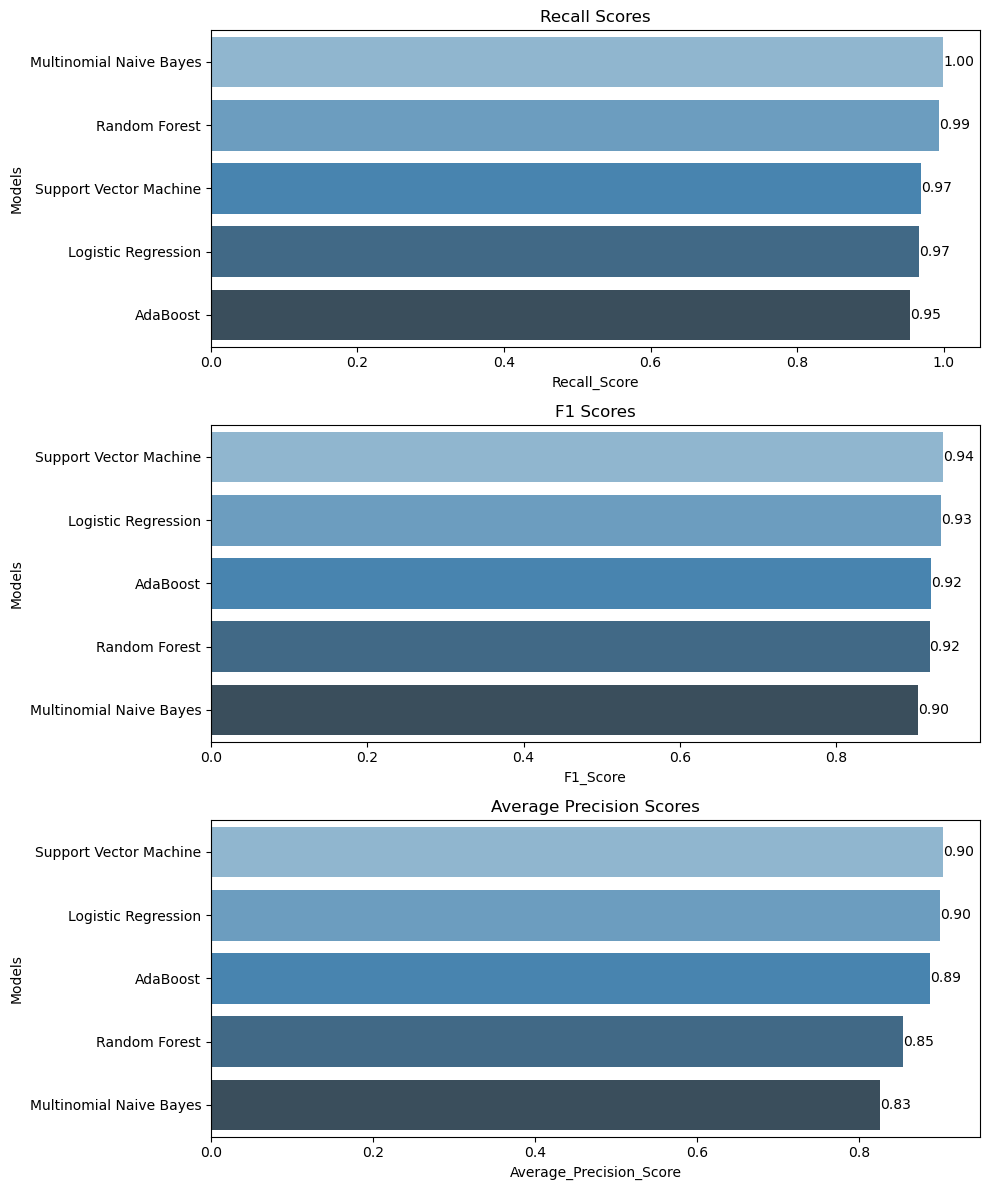

In [487]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace the placeholder values with your actual evaluation results
compare = pd.DataFrame({
    "Models": ["Logistic Regression", "Random Forest", "Support Vector Machine", "Multinomial Naive Bayes", "AdaBoost"],
    "F1_Score": [f1_logistic, f1_rf, f1_svm, f1_nb, f1_adaboost],
    "Recall_Score": [recall_logistic, recall_rf, recall_svm, recall_nb, recall_adaboost],
    "Average_Precision_Score": [average_precision_logistic, average_precision_rf, average_precision_svm, average_precision_nb, average_precision_adaboost]
})

# Plotting
plt.figure(figsize=(10, 12))

plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax = sns.barplot(x="Recall_Score", y="Models", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.title('Recall Scores')

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax = sns.barplot(x="F1_Score", y="Models", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.title('F1 Scores')

plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax = sns.barplot(x="Average_Precision_Score", y="Models", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.title('Average Precision Scores')

plt.tight_layout()
plt.show()


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___